# Marketing Customers

This is a portfolio project for the Udemy Online Course  https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/

You can get the data from https://www.kaggle.com/srolka/ecommerce-customers .

### Imports :-

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Exploration :-

Let's explore the data and get to know what we are dealing with.

In [2]:
df = pd.read_csv("/home/mihir/Desktop/Production/DataSet/EcommerceCustomersKaggleDataset/ecommerce-customers/Ecommerce Customers.csv")
print("Data has been successfully been loaded.")

Data has been successfully been loaded.


In [3]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

Let's use seaborn to plot some plots.

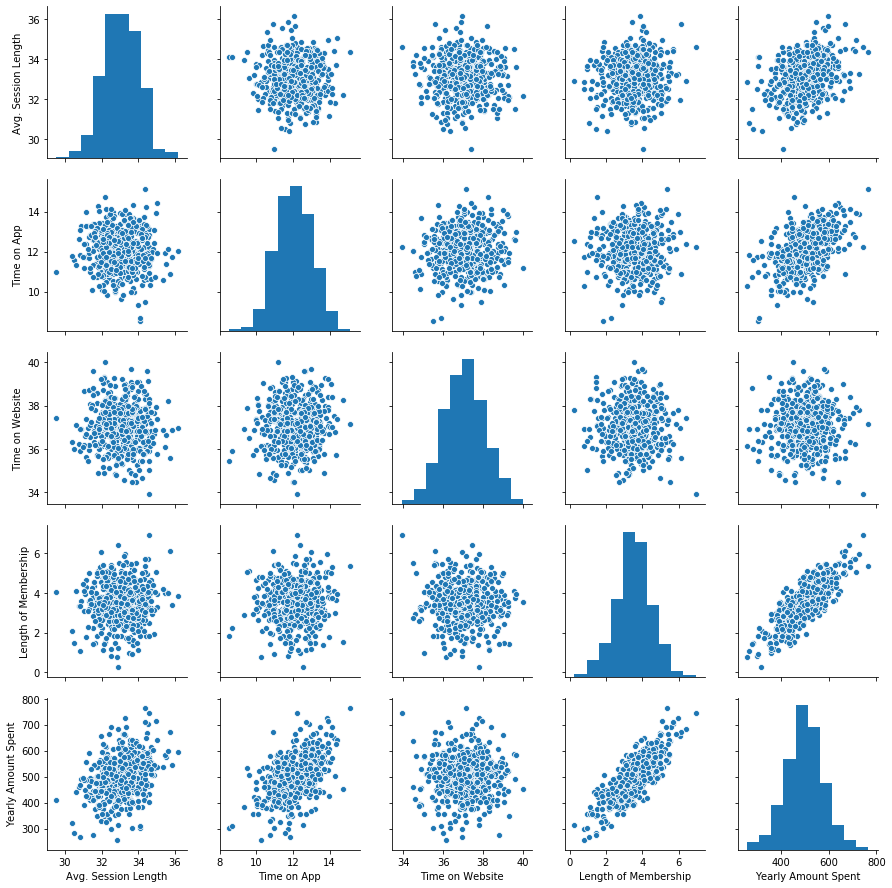

In [6]:
sns.pairplot(df)

Let's construct a heatmap of their correlation.

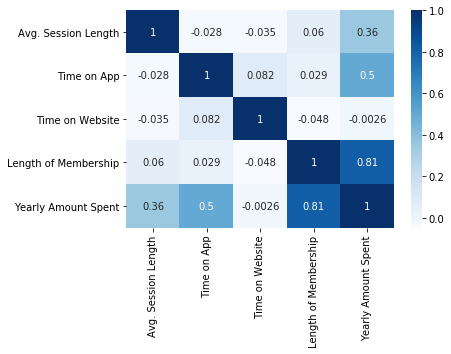

In [7]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

We can see there is a strog correlation between _Length of Membership_ and _Yearly Amount Spent_.

### Splitting the Data:-

Let's split the data in training and testing data. The feature we are interested in predicting is the _Yearly Amount Spent_. This means that _Yearly Amount Spent_ is the _dependent variable_ of the data.

In [8]:
X = df.loc[:, 'Avg. Session Length': 'Length of Membership']
y = df[['Yearly Amount Spent']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Training the Model

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lm.coef_

array([[25.65431442, 38.72022308,  0.25551295, 61.85972328]])

### Predicting the Model

Let's see how our model fares against test data.

In [13]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

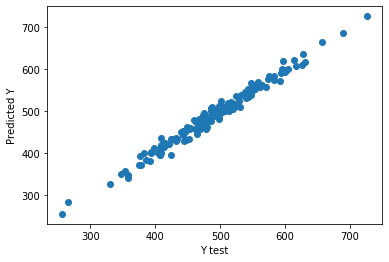

In [14]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

We can see that our model is pretty good.

### Evaluating the Model

Let's calculate some errors.

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 8.379404560973468
Mean Squared Error: 110.95461707469862
Root Mean Squared Error: 10.533499754340843


### Conclusion

In [16]:
coefficients = pd.DataFrame(lm.coef_[0], X.columns)
coefficients.columns = ['Coefficient']
coefficients

Coefficient
Avg. Session Length     25.654314
Time on App             38.720223
Time on Website          0.255513
Length of Membership    61.859723

These numbers means that holding all other features fixed, a 1 unit increase in Avg. Session Length will lead to an increase in $25.462677 in Yearly Amount Spent and similaraly for other features.

So Time on App is much more significant factor than Time on Website , the company has a choice either focus all the attention into the App as that would bring the most money in, or they could focus on the Website as it is performing poorly.